<a href="https://colab.research.google.com/github/AngelARVM/Python/blob/master/pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch, torchvision
import torch.nn as nn
from torch import optim
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
import time

* En T se transforma el dataset en tensores.
* Se descarga el dataset de imagenes en una "variable" image
* Se utiliza un generador DataLoader para pasar grupso de datos

In [ ]:
T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()]) 
image = torchvision.datasets.MNIST('mnist_data',transform=T,download=True)
image_loader = torch.utils.data.DataLoader(image, batch_size=128)

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


**Definiendo la topologia de la ANN**
* Se utilizan los metodos de superclase herado de nn.Module
* Se definen las capas de la ANN, las de entrada y salida y dos intermedias de 100 y 50 neuronas cada una.
* Se define una funcion de activacion, en este caso una  ReLU
* Se define el recorrido de los datos entre las distintas capas y se almacena cada calculo en output.



In [ ]:
class Classifier(nn.Module):
  def __init__ (self):
    super(Classifier,self).__init__()
    self.input_layer = nn.Linear (28*28, 100)
    self.hidden_layer = nn.Linear (100, 50)
    self.output_layer = nn.Linear (50, 10)
    self.activation = nn.ReLU()
  def forward(self, input_image):
    input_image = input_image.view(-1, 28*28)
    output = self.activation(self.input_layer(input_image))
    output = self.activation(self.hidden_layer(output))
    output = self.output_layer(output)
    return output
  

* Se inicializa la ANN
* Se define una funcion de perdida
* Se toman los parametos de la ANN
* Se define un algoritmo para optimizar la ANN
* Se define una variable para guardar las perdidas

In [ ]:
classifier = Classifier()
loss_function = nn.CrossEntropyLoss()
parameters = classifier.parameters()
optimizer = optim.Adam(params = parameters, lr = 0.001)
epochs = 40
iterations = 0
losses = np.array([])


***Bucle de entrenamiento***
* Se realiza una cantidad de entrenamiento igual a epochs
* Las imagenes y sus tags se transforman al tipo Variable para guardar los gradientes
* Se cargan las imagenes en la ANN
* Los gradientes se setean en cero
* Se calcula la perdida (o error)
* Se realiza el backpropagation
* Se guarda la cantidad de iteraciones y la cantidad de perdidas (errores)

In [ ]:
print(time.localtime())
for e in range(epochs):
  for i, (images, tags) in enumerate(image_loader):
    images, tags = Variable(images), Variable(tags)
    output = classifier(images)
    classifier.zero_grad()
    error = loss_function(output, tags)
    error.backward()
    optimizer.step()
    iterations += 1
    losses = np.append(losses, error.item())
print(time.localtime())

time.struct_time(tm_year=2020, tm_mon=4, tm_mday=30, tm_hour=18, tm_min=41, tm_sec=56, tm_wday=3, tm_yday=121, tm_isdst=0)
time.struct_time(tm_year=2020, tm_mon=4, tm_mday=30, tm_hour=18, tm_min=45, tm_sec=3, tm_wday=3, tm_yday=121, tm_isdst=0)


***Grafica***
* Se grafica el error en funcion de cada iteracion

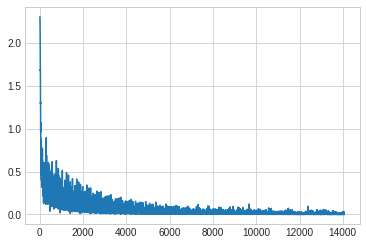

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.plot(np.arange(iterations), losses)

In [ ]:
%%time
tupla=(1, 2)

numero1, numero2 = tupla

print (numero1)
print (numero2)

1
2
CPU times: user 977 µs, sys: 0 ns, total: 977 µs
Wall time: 944 µs


In [ ]:
%%time
tupla=(1,2)

print(tupla[0])
print(tupla[1])

1
2
CPU times: user 914 µs, sys: 0 ns, total: 914 µs
Wall time: 809 µs
